# Clustering
## K-mean algoritması
* K değeri seç K=2 olsun
* Random centroid ata
* data pointerleri centroide göre uzaklığa (euclidean distance) bak ve cluster (gruplama)yap
* bu centroidlerin yeri değişmeyene kadar yeni centroid bul

### K değeri nasıl bulunur
 * WCSS= within cluster sum of squares ->wcss grafiğine göre dirsek noktası en optimal nokta olarak kabul edilir

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# create dataset //Gaussian variable
#class1 ->2 tane featuresi var
x1=np.random.normal(25,5,1000)
y1=np.random.normal(25,5,1000)

#class2
x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)

#class3
x3=np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)



In [5]:
x=np.concatenate((x1,x2,x3),axis=0) #Burada class larda olan x1 x2 ve x3 leri birleştirme işlemi yaptık
y=np.concatenate((y1,y2,y3),axis=0)#Burada da aynı şekilde y1 y2 y3 leri birleştirme işlemi yaptık


In [6]:
dictionary={"x":x,"y":y} #x ve y leri bir dictionary e yerleştirdik parametreleri ile
data=pd.DataFrame(dictionary) #normal dataset çağırır gibi aldık

In [8]:
data.head()

,x,y
0,14.759919,36.386903
1,18.340128,24.496183
2,33.373655,25.114763
3,32.375654,19.029687
4,26.331207,18.349769


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


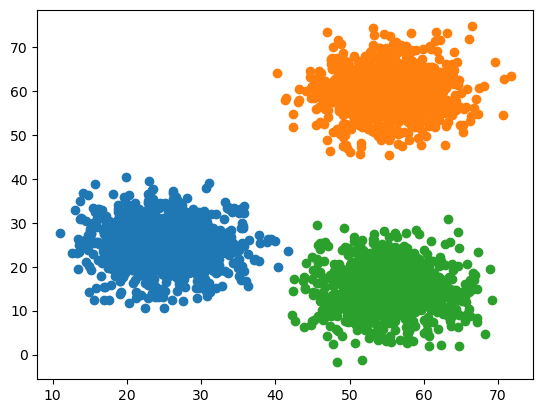

In [11]:
#visualization
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

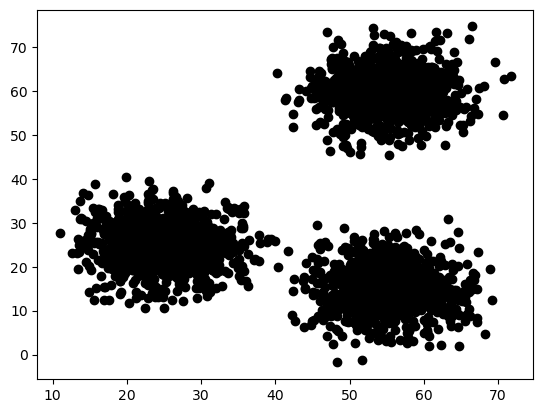

In [12]:
#K mean algoritmasının göreceği
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.show()

* Normlade bunlar class ama kmeans algoritması bunların nasıl classlar olduğunu bilmiyor, hangilerinin hangi classa ait olduğunu bilmiyor

In [18]:
# Bu ayırtı yapması için şu şekilde önce wcss belirlememiz lazım
#K means
import warnings #Uyarıları kapatmak için kullanılır
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,15):#1 den 15 e kadar giderek k değerleirni deneyecek ve ortaya çıkan k nın en optimal değerini alacak
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

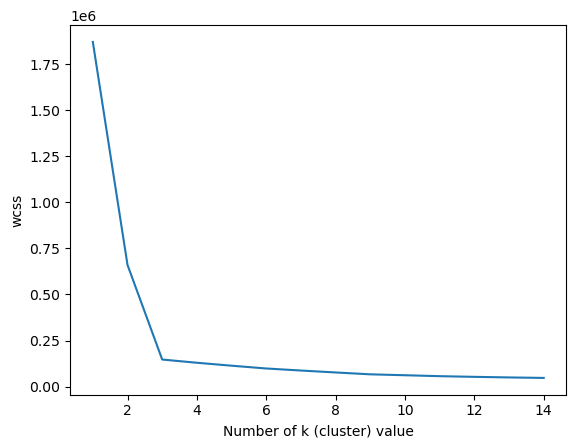

In [19]:
plt.plot(range(1,15),wcss)#Bu kod sayesinde algoritmamızın en iyi elbovu nerde yaptığını göreceğiz (dirsek) bu en iyi nokta anlamına geliyor
plt.xlabel("Number of k (cluster) value")
plt.ylabel("wcss")
plt.show()


In [20]:
# En uygun key değeri bulundu
#şimdi de bulunan değeri uygulayarak algoritma testi yapalım k=3 için deneme
kmeans2=KMeans(n_clusters=3)
Clusters=kmeans2.fit_predict(data)


In [25]:
Clusters

array([2, 2, 2, ..., 0, 0, 0])

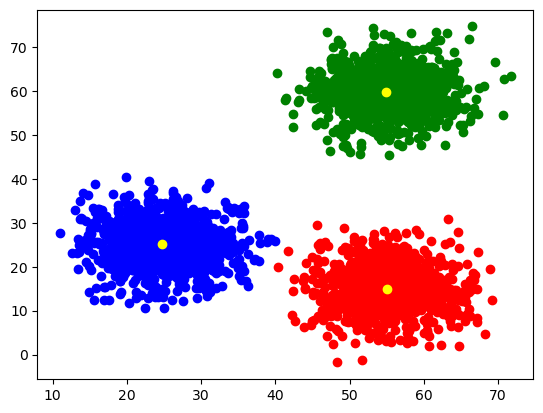

In [33]:
data["label"]=Clusters
plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red")
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green")
plt.scatter(data.x[data.label==2],data.y[data.label==2],color="blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")#bu da kümelerin merkezlerini bulmak içn kullanıyoruz
plt.show()
#Bu şekilde kmeans algoritması olması gerektiği gibi kümelere ayrıdı